In [137]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize, MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
%matplotlib inline

# 4.2.2 [K-Means](https://courses.thinkful.com/data-201v1/project/4.2.2)

1. $k$-means code here and see what happens when you change the value of $k$. 
2. What solution, if any, do you find most compelling?  
3. Does complexity start to become an issue with this data set? 
4. Play around a bit and write up your findings and your process.

It may be possible to have a solution with more than 2 clusters that is still better at tracker the binary outcome. Keep in mind that it may be possible to have a solution with more than two clusters that is still better at tracking the real binary outcome – two of those clusters may map to "heart disease" while the other maps to "no heart disease," for example.

Only 14 attributes used: 
1. #3 (age) 
2. #4 (sex) 
3. #9 (cp) 
4. #10 (trestbps) 
5. #12 (chol) 
6. #16 (fbs) 
7. #19 (restecg) 
8. #32 (thalach) 
9. #38 (exang) 
10. #40 (oldpeak) 
11. #41 (slope) 
12. #44 (ca) 
13. #51 (thal) 
14. #58 (num) (the predicted attribute) 

In [115]:
df = pd.read_csv("https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/cleveland.csv", header=None, error_bad_lines=False)
# Replace missing values (marked by ?) with a 0.
#df = df.replace(to_replace='?', value=0.0)
df[11] = df.replace(to_replace='?', value=0.0)
df[12] = df.replace(to_replace='?', value=0.0)


# Define the features and the outcome.
X = df.iloc[:, :13]
y = df.iloc[:, 13]

X = X.replace(to_replace= '?', value=0)

# Binarize y so that 1 means heart disease diagnosed and 0 means no diagnosis.
y = np.where(y > 0, 0, 1)

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3124: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0, right=0
  'left=%s, right=%s') % (left, right))


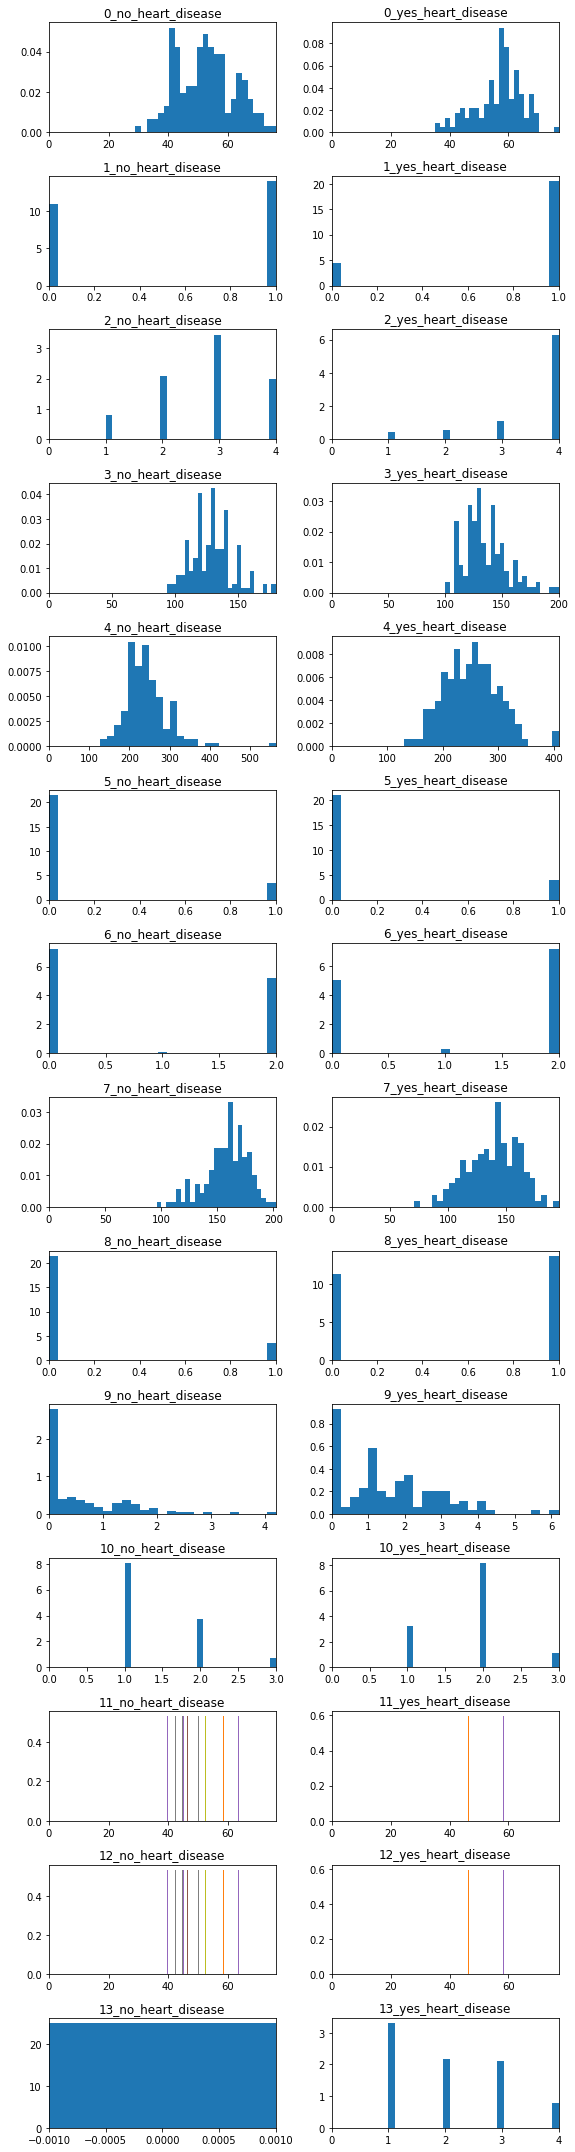

In [108]:
heart_disease = df[df.iloc[:,13]>0]
no = df[df.iloc[:,13]==0]

plt.figure(figsize=(8,30))
n = 0

for x in np.arange(len(df.columns)):    
    n=n+1
    plt.subplot(14,2,n)
    plt.hist(no.iloc[:,x], bins=25, density=True)
    plt.xlim(0,no.iloc[:,x].max())
    plt.xlabel('')
    plt.ylabel('')
    plt.title(str(no.columns[x])+str('_no_heart_disease'))
    
    n=n+1
    plt.subplot(14,2,n)
    plt.hist(heart_disease.iloc[:,x], bins=25, density=True)
    plt.xlim(0,heart_disease.iloc[:,x].max())
    plt.xlabel('')
    plt.ylabel('')
    plt.title(str(no.columns[x])+str('_yes_heart_disease'))
    #plt.title(no.columns[x]+str('_yes_heart_disease'))
    
plt.tight_layout()
plt.show()


In [8]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


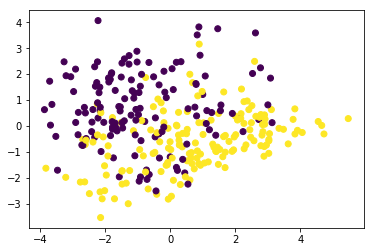

In [145]:
# Plot the solution.
plt.scatter(X_pca[:, 0], X_pca[:,1], c=y)
plt.show()

In [18]:
X_pca.shape

(303, 10)

In [ ]:
for pca_number in np.arange(2,11):
    # Normalize the data.
    scaler = MinMaxScaler()
    X_norm = scaler.fit_transform(X)

    # Reduce it to 2 components.
    X_pca = PCA(pca_number).fit_transform(X_norm)

    # Plot the solution.
    plt.scatter(X_pca[:, 0], X_pca[:,1], c=y)
    plt.show()

In [141]:
y.mean()

0.5412541254125413

In [143]:
for clusters in np.arange(2,4):
    # Normalize the data.
    scaler = StandardScaler()
    X_norm = scaler.fit_transform(X)
    X_pca =  PCA(3).fit_transform(X_norm)
    y_pred = KMeans(n_clusters=clusters, 
                init='k-means++').fit_predict(X_norm)
    print('Comparing k-means clusters against the data: {}'.format(clusters))
    cross = pd.crosstab(y_pred, y)
    cross['percent'] = cross.iloc[:,0]/(cross.iloc[:,0]+cross.iloc[:,1])
    print(cross)

Comparing k-means clusters against the data: 2
col_0    0    1   percent
row_0                    
0       36  104  0.257143
1      103   60  0.631902
Comparing k-means clusters against the data: 3
col_0   0   1   percent
row_0                  
0      25  68  0.268817
1      86  19  0.819048
2      28  77  0.266667


In [ ]:
# Plot the solution.
plt.scatter(X_pca[:, 0], X_pca[:,1], c=y)
plt.show()

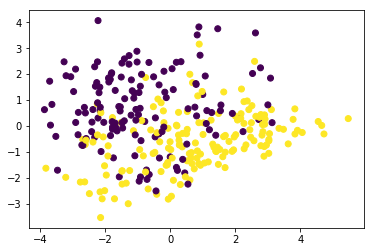

In [148]:
plt.scatter(X_pca[:,0], X_pca[:,1], c=y)

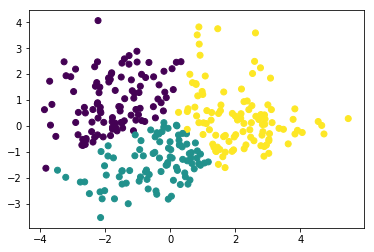

In [149]:
plt.scatter(X_pca[:,0], X_pca[:,1], c=y_pred)

In [144]:
for clusters in np.arange(2,4):
    # Normalize the data.
    scaler = StandardScaler()
    X_norm = scaler.fit_transform(X)
    X_pca =  PCA(2).fit_transform(X_norm)
    y_pred = KMeans(n_clusters=clusters, 
                init='k-means++').fit_predict(X_norm)
    print('Comparing k-means clusters against the data: {}'.format(clusters))
    cross = pd.crosstab(y_pred, y)
    cross['percent'] = cross.iloc[:,0]/(cross.iloc[:,0]+cross.iloc[:,1])
    print(cross)

Comparing k-means clusters against the data: 2
col_0    0    1   percent
row_0                    
0      103   60  0.631902
1       36  104  0.257143
Comparing k-means clusters against the data: 3
col_0   0   1   percent
row_0                  
0      86  18  0.826923
1      25  68  0.268817
2      28  78  0.264151


Comparing k-means clusters against the data: 3
col_0   0   1   percent
row_0                  
0      28  78  0.264151
1      86  18  0.826923
2      25  68  0.268817


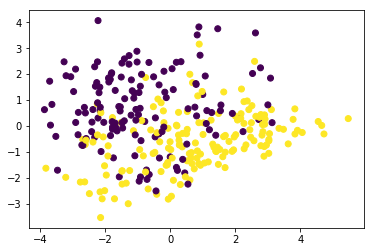

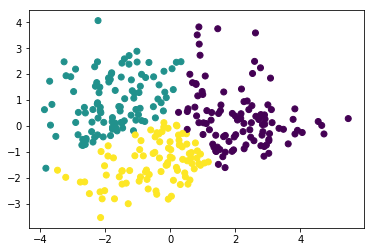

In [160]:
# Normalize the data.
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)
X_pca =  PCA(2).fit_transform(X_norm)
y_pred = KMeans(n_clusters=clusters, 
                init='k-means++').fit_predict(X_norm)
print('Comparing k-means clusters against the data: {}'.format(clusters))
cross = pd.crosstab(y_pred, y)
cross['percent'] = cross.iloc[:,0]/(cross.iloc[:,0]+cross.iloc[:,1])
print(cross)

# Plot the solution.
plt.scatter(X_pca[:, 0], X_pca[:,1], c=y)
plt.show()
plt.scatter(X_pca[:, 0], X_pca[:,1], c=y_pred)
plt.show()

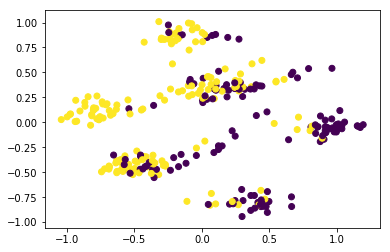

Comparing k-means clusters against the data: 
col_0   0   1   percent
row_0                  
0      55  97  0.361842
1      84  67  0.556291


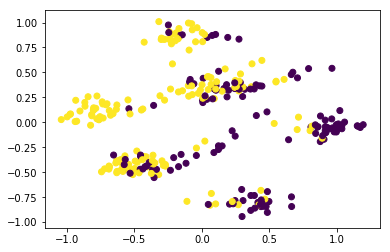

Comparing k-means clusters against the data: 
col_0   0   1   percent
row_0                  
0      83  69  0.546053
1      56  95  0.370861


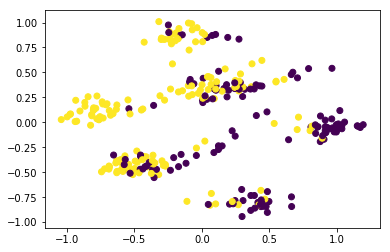

Comparing k-means clusters against the data: 
col_0   0   1   percent
row_0                  
0      56  95  0.370861
1      83  69  0.546053


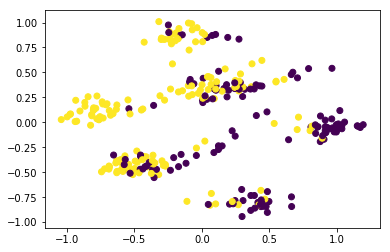

Comparing k-means clusters against the data: 
col_0   0   1   percent
row_0                  
0      83  69  0.546053
1      56  95  0.370861


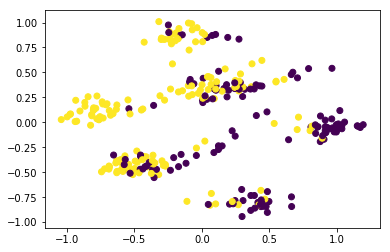

Comparing k-means clusters against the data: 
col_0   0   1   percent
row_0                  
0      83  69  0.546053
1      56  95  0.370861


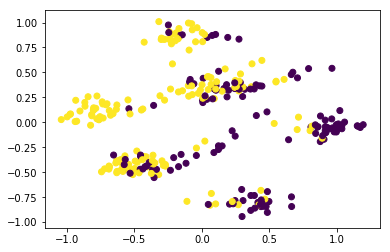

Comparing k-means clusters against the data: 
col_0   0    1   percent
row_0                   
0      63  141  0.308824
1      76   23  0.767677


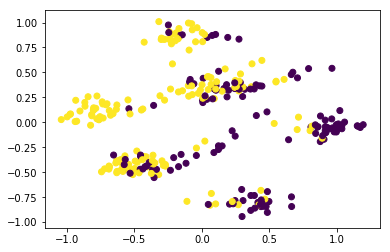

Comparing k-means clusters against the data: 
col_0   0    1   percent
row_0                   
0      76   23  0.767677
1      63  141  0.308824


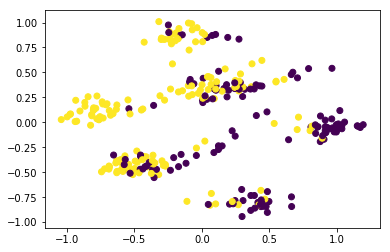

Comparing k-means clusters against the data: 
col_0   0    1   percent
row_0                   
0      63  141  0.308824
1      76   23  0.767677


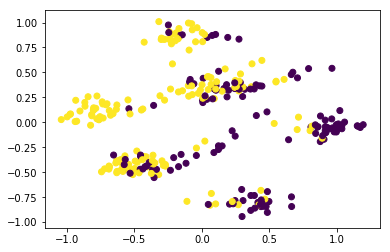

Comparing k-means clusters against the data: 
col_0   0    1   percent
row_0                   
0      63  141  0.308824
1      76   23  0.767677


In [134]:
for pca_number in np.arange(2,11):
    # Normalize the data.
    scaler = MinMaxScaler()
    X_norm = scaler.fit_transform(X)

    # Reduce it to 2 components.
    X_pca = PCA(pca_number).fit_transform(X_norm)

    # Plot the solution.
    #plt.scatter(X_pca[:, 0], X_pca[:,1], c=y)
    #plt.show()
    y_pred = KMeans(n_clusters=2, 
                init='k-means++').fit_predict(X_pca)
    print('Comparing k-means clusters against the data: ')
    cross = pd.crosstab(y_pred, y)
    cross['percent'] = cross.iloc[:,0]/(cross.iloc[:,0]+cross.iloc[:,1])
    print(cross)

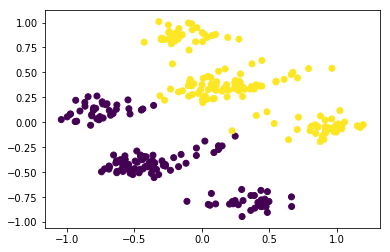

Comparing k-means clusters against the data: 
col_0   0   1   percent
row_0                  
0      56  95  0.370861
1      83  69  0.546053


In [130]:
# Normalize the data.
scaler = MinMaxScaler()
X_norm = scaler.fit_transform(X)

# Reduce it to 2 components.
X_pca = PCA(3).fit_transform(X_norm)

# Calculate predicted values.
y_pred = KMeans(n_clusters=2, 
                init='k-means++').fit_predict(X_pca)

# Plot the solution.
plt.scatter(X_pca[:, 0], X_pca[:,1], c=y_pred)
plt.show()

# Check the solution against the data.
print('Comparing k-means clusters against the data: ')
cross = pd.crosstab(y_pred, y)
cross['percent'] = cross.iloc[:,0]/(cross.iloc[:,0]+cross.iloc[:,1])
print(cross)

### Evaluating the models
With PCA using 2 features it looks like positive and negative diagnoses are mixed together, this suggests that 2 PCA features is not providing the information needed to evaluate whether someone has heart disease.

Checking out how much variance is explained by variables looks like 3 PCA features covers most variance (this doesn't necessarily mean they are useful.

When I tried Variations of PCA feature count with Cluster count it turned out to be a wash. A cluster with 50/50 demographric of heart disease diagnosis vs. non diagnosis. 

Text(0.5,1,'Scree Plot for our Components')

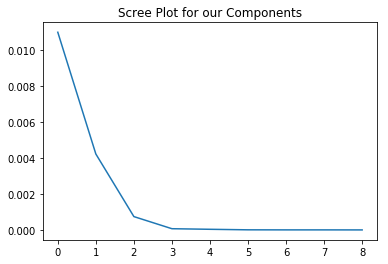

In [20]:
# Scale Data
X_norm = normalize(X)

# Instantiate PCA algorithm
sklearn_pca = PCA(n_components=9)

# Fit PCA algorithm
X_pca = sklearn_pca.fit_transform(X_norm)

# Extract explained variance & component features
var_ratios = (list(sklearn_pca.explained_variance_ratio_))
component_variances = (list(sklearn_pca.explained_variance_))
              
# Plotting to decide which features to keep
sorted_eigenvals = sorted(component_variances, reverse=True)
plt.plot(sorted_eigenvals)
plt.title("Scree Plot for our Components")

Text(0.5,1,'Scree Plot for our Components')

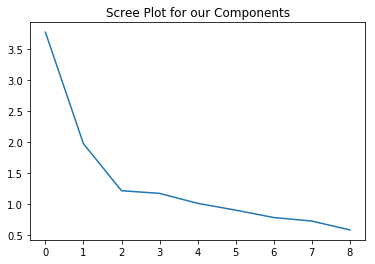

In [166]:
# Normalize the data.
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)

# Instantiate PCA algorithm
sklearn_pca = PCA(n_components=9)

# Fit PCA algorithm
X_pca = sklearn_pca.fit_transform(X_norm)

# Extract explained variance & component features
var_ratios = (list(sklearn_pca.explained_variance_ratio_))
component_variances = (list(sklearn_pca.explained_variance_))
              
# Plotting to decide which features to keep
sorted_eigenvals = sorted(component_variances, reverse=True)
plt.plot(sorted_eigenvals)
plt.title("Scree Plot for our Components")

# MiniBatch

In [5]:
# Each batch will be made up of 200 data points.
minibatchkmeans = MiniBatchKMeans(
    init='random',
    n_clusters=2, 
    batch_size=200)
%time minibatchkmeans.fit(X_pca)

# Add the new predicted cluster memberships to the dataframe
%time predict_mini = minibatchkmeans.predict(X_pca)

# Check the MiniBatch model against our earlier one.
print('Comparing k-means and mini batch k-means solutions:')
print(pd.crosstab(predict_mini, y_pred))

CPU times: user 20.4 ms, sys: 2.03 ms, total: 22.4 ms
Wall time: 23.2 ms
CPU times: user 1.56 ms, sys: 345 µs, total: 1.91 ms
Wall time: 1.76 ms
Comparing k-means and mini batch k-means solutions:
col_0    0    1
row_0          
0      144    1
1        5  153
